<a href="https://colab.research.google.com/github/ndawinata/googleCO/blob/master/Analisa_Saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import pandas_datareader.data as web
import datetime

In [ ]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020,9,24)

In [ ]:
df = web.DataReader("TLKM.JK", "yahoo", start=start, end=end)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,4440.0,4440.0,4440.0,4440.0,0.0,4130.720703
2018-01-02,4460.0,4380.0,4430.0,4410.0,66075600.0,4102.810059
2018-01-03,4380.0,4200.0,4380.0,4230.0,129205000.0,3935.348389
2018-01-04,4250.0,4190.0,4230.0,4220.0,77953300.0,3926.045166
2018-01-05,4280.0,4200.0,4220.0,4280.0,55863000.0,3981.865967


In [ ]:
len(df)

698

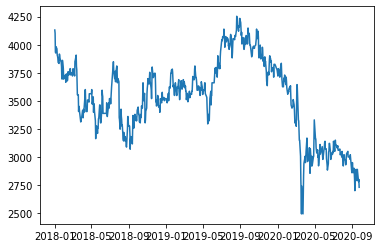

In [ ]:
plt.plot(df['Adj Close'])

In [ ]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=30).mean()
# mavg = moving average
# window=30 -> rata rata per 30 baris
mavg2 = close_px.rolling(window=90, center=True).mean()

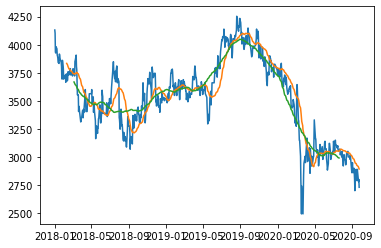

In [ ]:
plt.plot(close_px)
plt.plot(mavg)
plt.plot(mavg2)

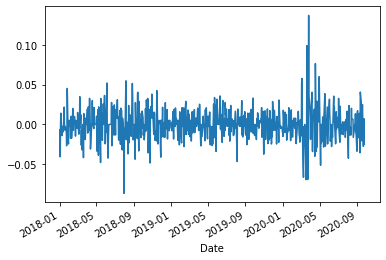

In [ ]:
# return deviationn / jika beli sekarang nanti kita jual (rets)

rets = close_px / close_px.shift(1) - 1
rets.plot()

In [ ]:
# komparasi antar emiten

dfcomp = web.DataReader(['BBCA.JK', 'BMRI.JK', 'BBNI.JK', 'BBRI.JK'], 'yahoo', start=start, end=end)['Adj Close']

In [ ]:
dfcomp = dfcomp.dropna() 
# drop data kosong
dfcomp.head()

Symbols,BBCA.JK,BMRI.JK,BBNI.JK,BBRI.JK
Date,,,,
2018-01-01,21035.916016,7009.775391,9123.761719,3282.748779
2018-01-02,21035.916016,6878.342285,9008.562500,3273.730225
2018-01-03,21035.916016,6746.909180,8686.005859,3255.693115
2018-01-04,21348.093750,6856.436523,8662.964844,3201.581787
2018-01-05,21372.105469,6856.436523,8570.806641,3237.656006


In [ ]:
# perubahan persentase (percent change)
retscomp = dfcomp.pct_change()
# korelasi
corr = retscomp.corr()

In [ ]:
corr

Symbols,BBCA.JK,BMRI.JK,BBNI.JK,BBRI.JK
Symbols,,,,
BBCA.JK,1.000000,0.608812,0.548020,0.596950
BMRI.JK,0.608812,1.000000,0.783323,0.762466
BBNI.JK,0.548020,0.783323,1.000000,0.751158
BBRI.JK,0.596950,0.762466,0.751158,1.000000


([<matplotlib.axis.YTick at 0x7f14556b0cf8>,
 [Text(0, 0, 'BBCA.JK'),
  Text(0, 0, 'BMRI.JK'),
  Text(0, 0, 'BBNI.JK'),
  Text(0, 0, 'BBRI.JK')])

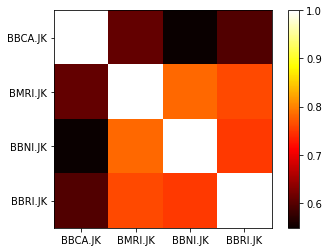

In [ ]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

# semakin terang maka semakin berkorelasi